# **Dataset**

Penerapan `K-Means` untuk mengelompokkan jenis kelamin penguin berdasarkan 5 variabel, yakni :

| Variabel       | Keterangan |
|------------|------|
|culmen_length_mm| Panjang culmen (mm)|
|culmen_depth_mm| Kedalaman culmen (mm)|
|flipper_length_mm| Panjang sirip (mm)|
|body_mass_g| Massa tubuh (g)|
|sex| Jenis kelamin penguin|

Sumber data : https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [460]:
data = pd.read_csv('/content/penguins.csv')
data.head(16)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


# **Preprocecing Data**

In [461]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [462]:
# cek kategori fitur sex
data.sex.value_counts()

,count
sex,
MALE,169
FEMALE,165
.,1


In [463]:
# cek missing value
data.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [464]:
# cek data duplikat
data.duplicated().sum()

np.int64(1)

Berdasarkan pemeriksaan data diatas terdapat missing value, data duplikat dan nilai yang tidak sesuai dengan isi fitur. Maka, harus dilakukan cleaning pada dataset.

In [465]:
# hapus baris missing value
data.dropna(inplace=True)
data.isna().sum()

,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [466]:
# hapus baris missing value
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [467]:
# hapus nilai yang tidak sesuai dengan fitur
data_cleaned1 = data.drop(data[data['sex']=='.'].index)
data_cleaned1.sex.value_counts()

,count
sex,
MALE,169
FEMALE,165


In [468]:
data_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   334 non-null    float64
 1   culmen_depth_mm    334 non-null    float64
 2   flipper_length_mm  334 non-null    float64
 3   body_mass_g        334 non-null    float64
 4   sex                334 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [469]:
data_cleaned1.head(16)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
9,42.0,20.2,5000.0,4250.0,MALE
12,41.1,17.6,182.0,3200.0,FEMALE
13,38.6,21.2,191.0,3800.0,MALE


Setelah menangani missing value, data duplikat dan nilai yang tidak sesuai dengan isi fitur. Selanjutnya dilakukan pemeriksaan outlier data.

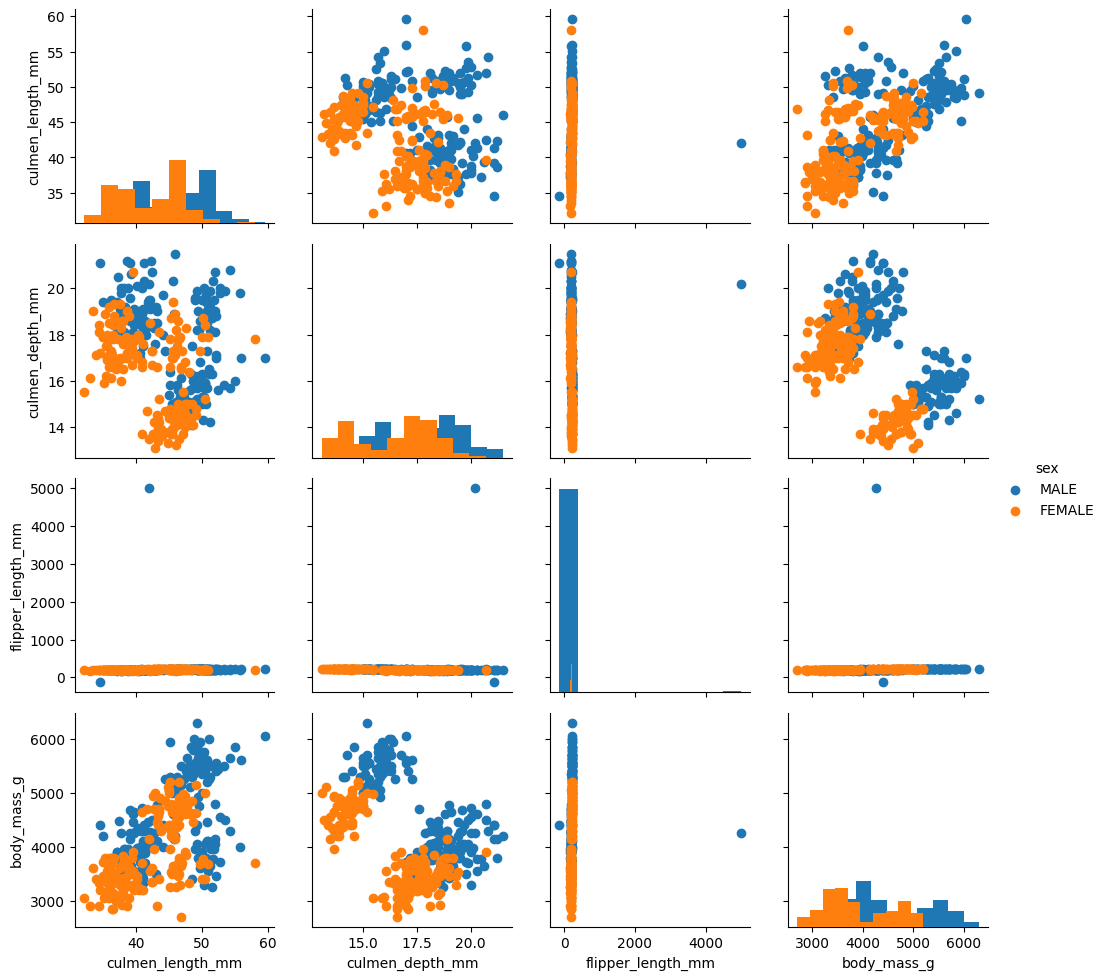

In [470]:
# Pairplot data_cleaned1
g = sns.PairGrid(data_cleaned1, hue="sex")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

Berdasarkan visualisasi pairplot, terlihat bahwa terdapat pemisahan yang cukup jelas antara jantan (MALE) dan betina (FEMALE) pada fitur seperti `body_mass_g` dan `culmen_length_mm`, yang menunjukkan bahwa penguin jantan cenderung memiliki ukuran tubuh dan panjang culmen (paruh) yang lebih besar. Namun, terdapat satu kolom yang mencurigakan, yaitu `flipper_length_mm`, yang tampak memiliki banyak nilai nol atau ekstrem. Pada baris dan kolom ketiga, semua titik menumpuk secara vertikal di angka rendah dan ada outlier yang sangat tinggi. Hal ini menandakan adanya data outlier atau error pencatatan yang perlu dibersihkan.

In [471]:
# mengubah data kategorikal (sex) menjadi numerik
from sklearn.preprocessing import LabelEncoder
data_encoded1 = data_cleaned1.copy()

encoder = LabelEncoder()
data_encoded1['sex'] = encoder.fit_transform(data_cleaned1['sex'])
data_encoded1.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [472]:
# cek outlier data_cleaned1
outliers = {}
for col in data_encoded1.select_dtypes(include=np.number).columns:
    Q1 = data_encoded1[col].quantile(0.25)
    Q3 = data_encoded1[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outlier_values = data_encoded1[(data_encoded1[col] < batas_bawah) | (data_encoded1[col] > batas_atas)][col]
    outliers[col] = outlier_values.tolist()

for col, vals in outliers.items():
    print(f"Outlier pada kolom {col}: {vals if vals else 'Tidak ada'}")

Outlier pada kolom culmen_length_mm: Tidak ada
Outlier pada kolom culmen_depth_mm: Tidak ada
Outlier pada kolom flipper_length_mm: [5000.0, -132.0]
Outlier pada kolom body_mass_g: Tidak ada
Outlier pada kolom sex: Tidak ada


Berdasarkan pemeriksaan outlier, pada fitur `flipper_length_mm` terdapat outlier.

In [473]:
print(data_cleaned1[data_cleaned1["flipper_length_mm"] > 4000])
print(data_cleaned1[data_cleaned1["flipper_length_mm"] < 0])

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE


Outlier pada fitut `flipper_length_mm` berada di baris ke 9 dan 14.

In [474]:
# menghapus baris dengan outlier
data_cleaned2=data_cleaned1.drop([9, 14])
data_cleaned2.head(16)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
12,41.1,17.6,182.0,3200.0,FEMALE
13,38.6,21.2,191.0,3800.0,MALE
15,36.6,17.8,185.0,3700.0,FEMALE


In [475]:
# mengubah data kategorikal (sex) menjadi numerik.
from sklearn.preprocessing import LabelEncoder
data_encoded2 = data_cleaned2.copy()

encoder = LabelEncoder()
data_encoded2['sex'] = encoder.fit_transform(data_cleaned2['sex'])
data_encoded2.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [476]:
# cek outlier data_cleaned2
outliers = {}
for col in data_encoded2.select_dtypes(include=np.number).columns:
    Q1 = data_encoded2[col].quantile(0.25)
    Q3 = data_encoded2[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    outlier_values = data_encoded2[(data_encoded2[col] < batas_bawah) | (data_encoded2[col] > batas_atas)][col]
    outliers[col] = outlier_values.tolist()

for col, vals in outliers.items():
    print(f"Outlier pada kolom {col}: {vals if vals else 'Tidak ada'}")

Outlier pada kolom culmen_length_mm: Tidak ada
Outlier pada kolom culmen_depth_mm: Tidak ada
Outlier pada kolom flipper_length_mm: Tidak ada
Outlier pada kolom body_mass_g: Tidak ada
Outlier pada kolom sex: Tidak ada


Berdasarkan pemeriksaan outlier kedua, tidak terdapat outlier pada semua fitur.

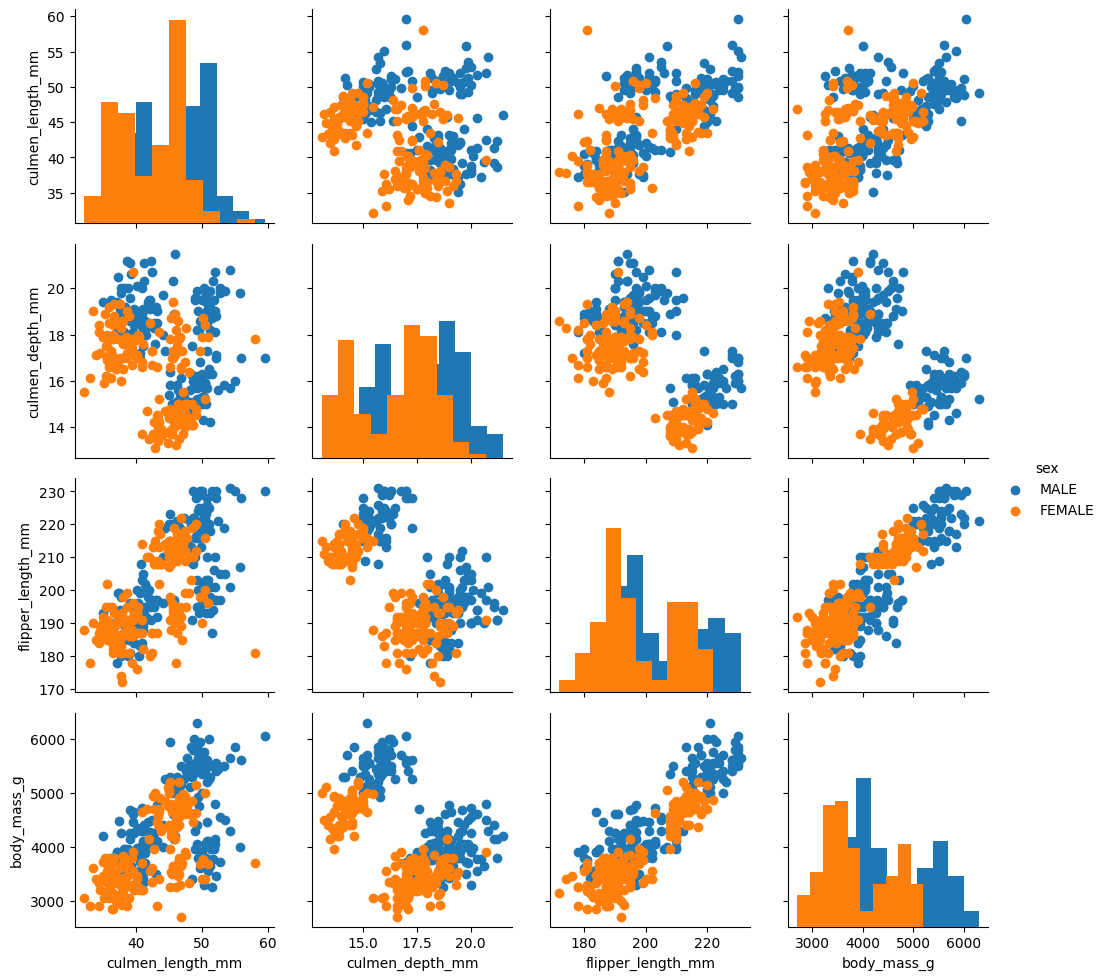

In [477]:
# Pairplot data_cleaned2
g = sns.PairGrid(data_cleaned2, hue="sex")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

Berdasarkan visualisasi pairplot setelah menghapus baris outlier, terlihat bahwa penguin jantan (MALE) cenderung memiliki nilai yang lebih tinggi pada hampir semua fitur `(culmen_length_mm, flipper_length_mm, dan body_mass_g)` dibandingkan betina (FEMALE). Hal ini ditunjukkan pada distribusi histogram yang bergeser ke kanan untuk penguin jantan, serta pemisahan visual yang cukup jelas pada scatter plot. Tidak tampak outlier ekstrem seperti pada visualisasi sebelumnya, menandakan bahwa data telah dibersihkan.

# **Standarisasi Data**

In [478]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(data_encoded2)
data_scaled = pd.DataFrame(data=x, columns=data_encoded2.columns)
data_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


# **Menentukan Jumlah *Cluster***


## **Elbow**

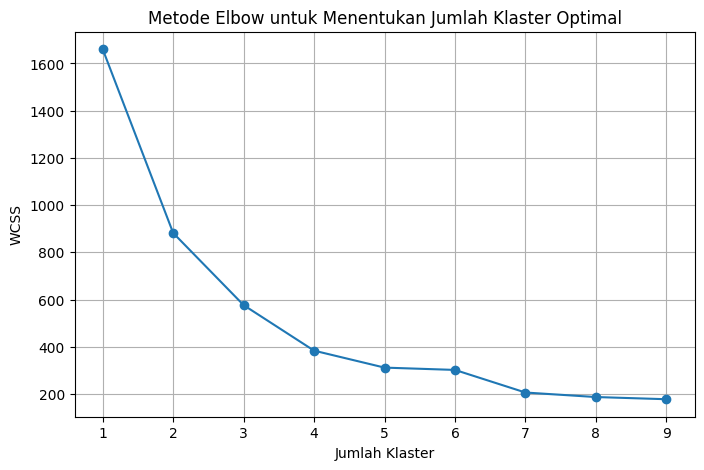

In [479]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Berdasarkan grafik Elbow, jumlah klaster optimal berada diantar 2 dan 4. Selanjutnya, dilakukan pemeriksaan `Silhouette` agar lebih akurat.

## **Silhouette**

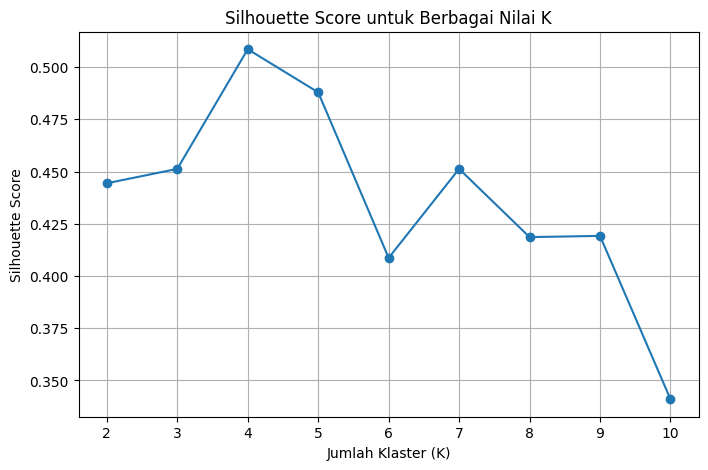

Nilai K optimal: 4, dengan Silhouette Score tertinggi: 0.5086


In [480]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagai Nilai K')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
optimal_score = max(silhouette_scores)

print(f"Nilai K optimal: {optimal_k}, dengan Silhouette Score tertinggi: {optimal_score:.4f}")

Berdasarkan grafik Silhouette, jumlah klaster optimal adalah 4. Selanjutnya dapat dilakukan `clustering` dengan `K-Means`.

# **Clustering**

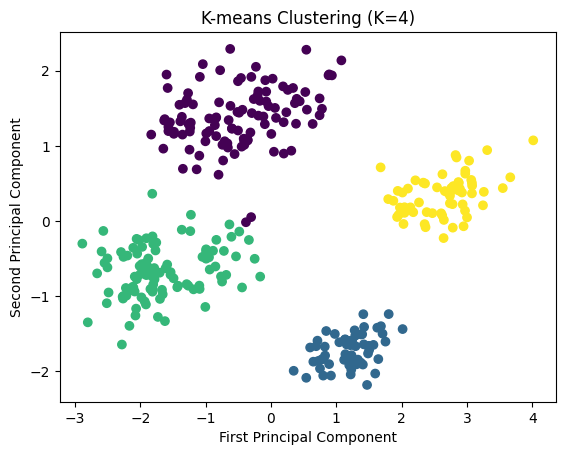

In [481]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
penguins_PCA = pca.fit_transform(data_scaled)
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={4})")
plt.show()

Berdasarkan hasil *clustering* dengan K = 4, terlihat bahwa 4 klaster terbentuk dengan cukup baik dan terpisah secara jelas. Hal ini menunjukkan bahwa PCA berhasil menangkap variansi utama dalam data dan bahwa struktur klaster cukup kuat. Distribusi yang rapat dalam masing-masing kelompok mengindikasikan bahwa K-Means berhasil menemukan sentroid yang representatif bagi masing-masing klaster.